<a href="https://colab.research.google.com/github/JPT35/CS430_Projects/blob/main/MLA_JPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning Assignment 1

John Paul Thomas

CS430-ON

Machine Learning in the Cloud

In [ ]:
from ast import increment_lineno
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('content/gdrive')


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/CS-430/weather_2012.csv')

In [ ]:
df.head()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [ ]:
df.head(5)

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [ ]:
df.tail(5)

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow
8783,2012-12-31 23:00:00,0.0,-2.1,86,30,11.3,99.89,Snow


In [ ]:
df.sample(5)

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
8492,2012-12-19 20:00:00,0.7,0.1,96,11,6.4,101.32,"Snow,Fog"
957,2012-02-09 21:00:00,0.2,-5.5,65,22,25.0,101.13,Clear
7750,2012-11-18 22:00:00,-1.3,-6.9,66,11,25.0,103.25,Cloudy
2909,2012-05-01 05:00:00,7.8,5.1,83,24,11.3,101.13,Rain
3128,2012-05-10 08:00:00,9.0,5.6,79,20,24.1,99.51,Cloudy


In [ ]:
df.columns

Index(['Date/Time', 'Temp (C)', 'Dew Point Temp (C)', 'Rel Hum (%)',
       'Wind Spd (km/h)', 'Visibility (km)', 'Stn Press (kPa)', 'Weather'],
      dtype='object')

In [ ]:
df = df.rename(columns={'Date/Time':'date_time','Temp (C)':'temp_c','Dew Point Temp (C)':'dew_point', 'Rel Hum (%)':'relative_humidity', 'Wind Spd (km/h)':'wind_speed', 'Visibility (km)':'visibility','Stn Press (kPa)':'pressure','Weather':'weather'})

In [ ]:
print(df)

                date_time  temp_c  dew_point  relative_humidity  wind_speed  \
0     2012-01-01 00:00:00    -1.8       -3.9                 86           4   
1     2012-01-01 01:00:00    -1.8       -3.7                 87           4   
2     2012-01-01 02:00:00    -1.8       -3.4                 89           7   
3     2012-01-01 03:00:00    -1.5       -3.2                 88           6   
4     2012-01-01 04:00:00    -1.5       -3.3                 88           7   
...                   ...     ...        ...                ...         ...   
8779  2012-12-31 19:00:00     0.1       -2.7                 81          30   
8780  2012-12-31 20:00:00     0.2       -2.4                 83          24   
8781  2012-12-31 21:00:00    -0.5       -1.5                 93          28   
8782  2012-12-31 22:00:00    -0.2       -1.8                 89          28   
8783  2012-12-31 23:00:00     0.0       -2.1                 86          30   

      visibility  pressure               weather  


In [ ]:
stats = df.describe()

In [ ]:
print(stats)

            temp_f    dew_point  relative_humidity   wind_speed   visibility  \
count  8784.000000  8784.000000        8784.000000  8784.000000  8784.000000   
mean     47.836660     2.555294          67.431694    14.945469    27.664447   
std      21.038189    10.883072          16.918881     8.688696    12.622688   
min      -9.940000   -28.500000          18.000000     0.000000     0.200000   
25%      32.180000    -5.900000          56.000000     9.000000    24.100000   
50%      48.740000     3.300000          68.000000    13.000000    25.000000   
75%      65.840000    11.800000          81.000000    20.000000    25.000000   
max      91.400000    24.400000         100.000000    83.000000    48.300000   

          pressure       temp_c        month  
count  8784.000000  8784.000000  8784.000000  
mean    101.051623     8.798144     6.513661  
std       0.844005    11.687883     3.451430  
min      97.520000   -23.300000     1.000000  
25%     100.560000     0.100000     4.000000

In [ ]:
df['temp_f'] = df['temp_c'] * 9/5 + 32

In [ ]:
print(df)

                date_time  temp_c  dew_point  relative_humidity  wind_speed  \
0     2012-01-01 00:00:00    -1.8       -3.9                 86           4   
1     2012-01-01 01:00:00    -1.8       -3.7                 87           4   
2     2012-01-01 02:00:00    -1.8       -3.4                 89           7   
3     2012-01-01 03:00:00    -1.5       -3.2                 88           6   
4     2012-01-01 04:00:00    -1.5       -3.3                 88           7   
...                   ...     ...        ...                ...         ...   
8779  2012-12-31 19:00:00     0.1       -2.7                 81          30   
8780  2012-12-31 20:00:00     0.2       -2.4                 83          24   
8781  2012-12-31 21:00:00    -0.5       -1.5                 93          28   
8782  2012-12-31 22:00:00    -0.2       -1.8                 89          28   
8783  2012-12-31 23:00:00     0.0       -2.1                 86          30   

      visibility  pressure               weather  t

In [ ]:
cols = list(df.columns)
date_time_index = cols.index('date_time')
dew_point_index = cols.index('dew_point')
temp_f_index = cols.index('temp_f')
temp_c_index = cols.index('temp_c')
relative_humidity_index = cols.index('relative_humidity')
wind_speed_index = cols.index('wind_speed')
visibility_index = cols.index('visibility')
pressure_index = cols.index('pressure')
weather_index = cols.index('weather')




df = df[cols]


In [ ]:
print(df)

               date_time  temp_f  temp_c  relative_humidity  wind_speed  \
0    2012-01-01 00:00:00   28.76    -1.8                 86           4   
1    2012-01-01 01:00:00   28.76    -1.8                 87           4   
2    2012-01-01 02:00:00   28.76    -1.8                 89           7   
3    2012-01-01 03:00:00   29.30    -1.5                 88           6   
4    2012-01-01 04:00:00   29.30    -1.5                 88           7   
...                  ...     ...     ...                ...         ...   
8779 2012-12-31 19:00:00   32.18     0.1                 81          30   
8780 2012-12-31 20:00:00   32.36     0.2                 83          24   
8781 2012-12-31 21:00:00   31.10    -0.5                 93          28   
8782 2012-12-31 22:00:00   31.64    -0.2                 89          28   
8783 2012-12-31 23:00:00   32.00     0.0                 86          30   

      visibility  pressure               weather  dew_point  month  
0            8.0    101.24    

In [ ]:
print(df.dtypes)

date_time             object
temp_f               float64
dew_point            float64
relative_humidity      int64
wind_speed             int64
visibility           float64
pressure             float64
weather               object
temp_c               float64
dtype: object


In [ ]:
df['date_time'] = pd.to_datetime(df['date_time'])

In [ ]:
print(df.dtypes)

date_time            datetime64[ns]
temp_f                      float64
dew_point                   float64
relative_humidity             int64
wind_speed                    int64
visibility                  float64
pressure                    float64
weather                      object
temp_c                      float64
dtype: object


In [ ]:
df['month'] = df['date_time'].dt.month
monthly_avg = df.groupby('month')['temp_f'].mean()


In [ ]:
print(df)

               date_time  temp_f  dew_point  relative_humidity  wind_speed  \
0    2012-01-01 00:00:00   28.76       -3.9                 86           4   
1    2012-01-01 01:00:00   28.76       -3.7                 87           4   
2    2012-01-01 02:00:00   28.76       -3.4                 89           7   
3    2012-01-01 03:00:00   29.30       -3.2                 88           6   
4    2012-01-01 04:00:00   29.30       -3.3                 88           7   
...                  ...     ...        ...                ...         ...   
8779 2012-12-31 19:00:00   32.18       -2.7                 81          30   
8780 2012-12-31 20:00:00   32.36       -2.4                 83          24   
8781 2012-12-31 21:00:00   31.10       -1.5                 93          28   
8782 2012-12-31 22:00:00   31.64       -1.8                 89          28   
8783 2012-12-31 23:00:00   32.00       -2.1                 86          30   

      visibility  pressure               weather  temp_c  month

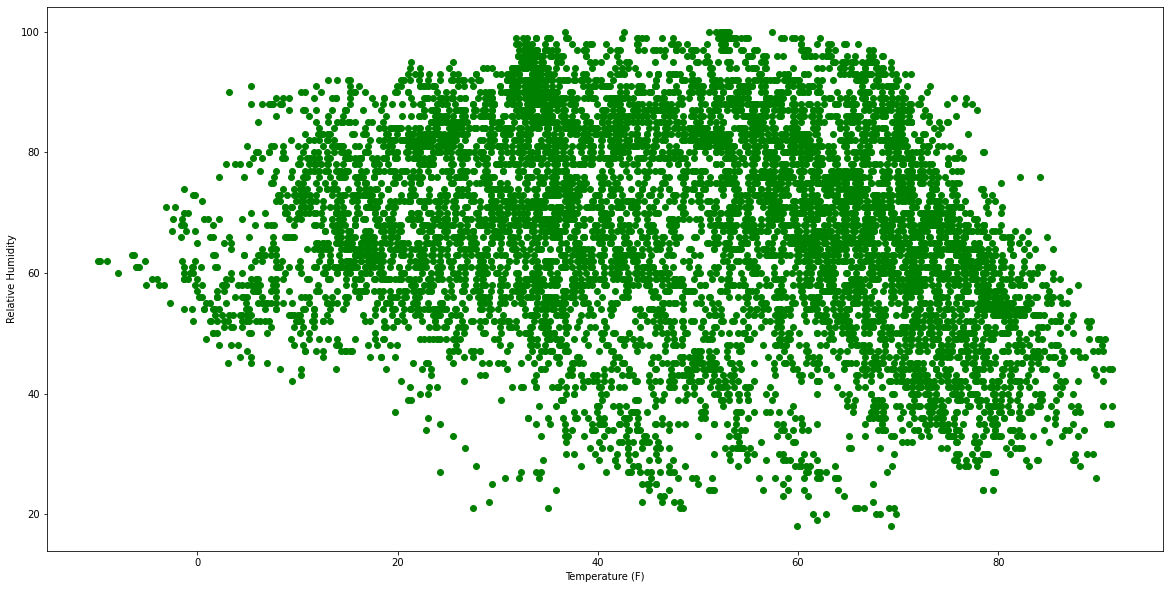

In [ ]:
plt.figure(figsize=(20, 10))
plt.scatter(df['temp_f'], df['relative_humidity'], color = 'green')
plt.xlabel('Temperature (F)')
plt.ylabel('Relative Humidity')
plt.show()

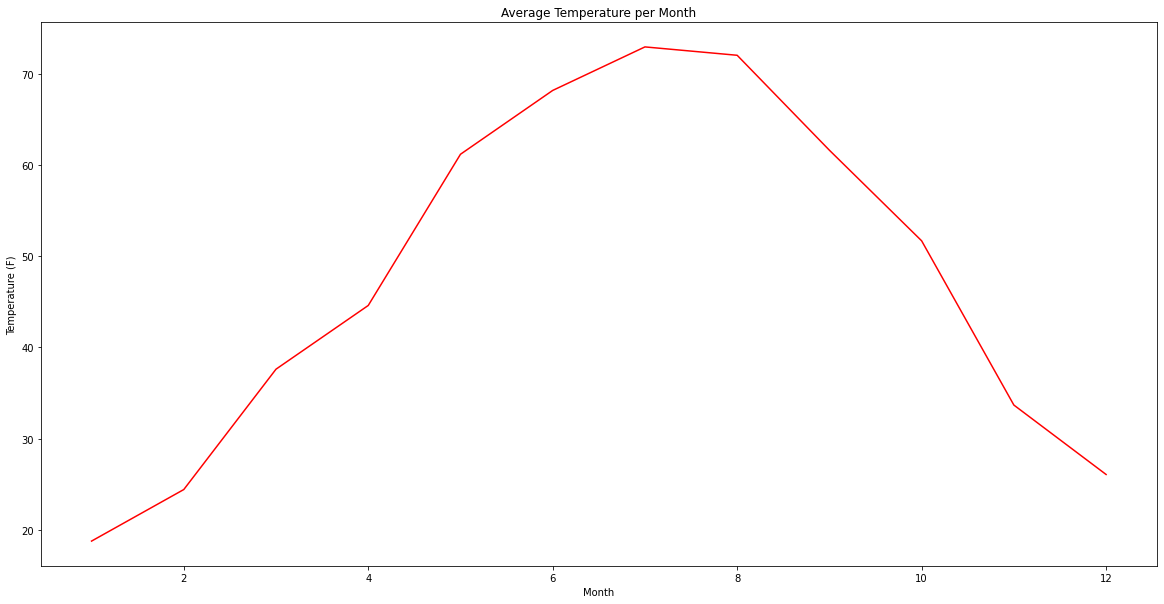

In [ ]:
df['month'] = df['date_time'].dt.month
monthly_avg = df.groupby('month')['temp_f'].mean()

plt.figure(figsize=(20, 10))
monthly_avg.plot(kind='line', color = 'red')
plt.xlabel('Month')
plt.ylabel('Temperature (F)')
plt.title('Average Temperature per Month')
plt.show()

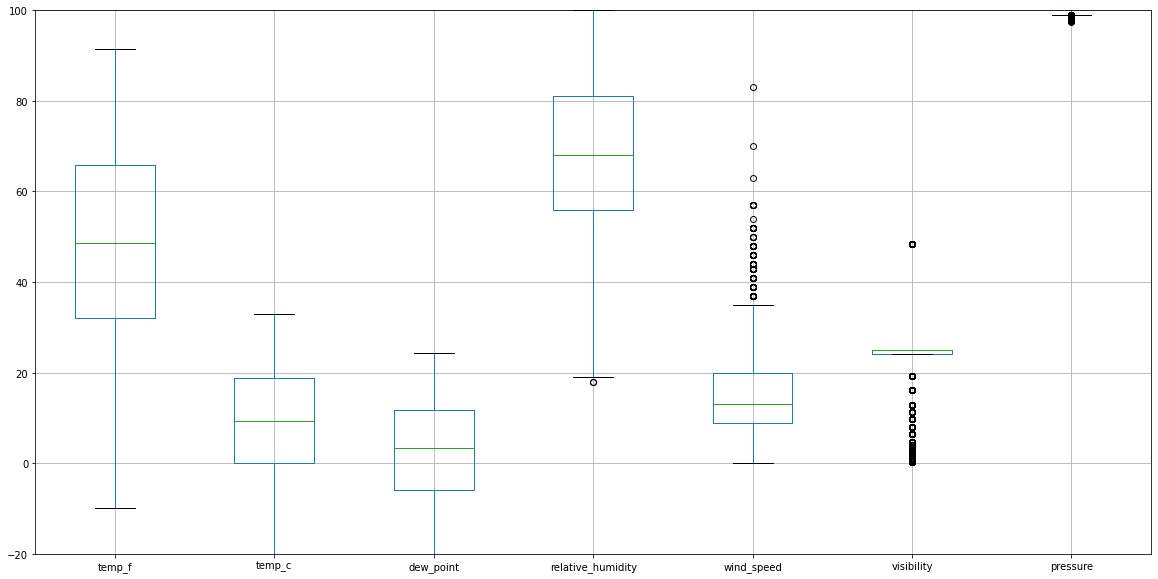

In [ ]:
plt.figure(figsize=(20,10))
df.boxplot(column=['temp_f', 'temp_c', 'dew_point', 'relative_humidity', 'wind_speed', 'visibility', 'pressure'])
plt.ylim(-20, 100)
plt.show()
